In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [20]:
if os.path.split(os.getcwd())[-1] == 'notebooks': os.chdir(os.path.split(os.getcwd())[-2])
print(os.getcwd())

/home/fitzaudoen/apps/gas-sensor-analytics-demo


# Prepare data

In [21]:
df = pd.read_pickle('data/processed/train_data.pkl')

In [22]:
data = df.values
batch_id = data[:,0]
y = data[:,1]
X = data[:,3:]
cols = df.columns.values

In [89]:
X

array([[-0.31454734, -0.71204585, -0.36103879, ...,  0.56760877,
         0.50370627,  0.05748028],
       [-0.84195435, -0.96103458, -0.74933229, ...,  1.30657738,
         1.2601785 ,  1.03639628],
       [-0.76244708, -0.68376627, -0.79105263, ..., -1.43089132,
        -1.24712748, -0.43307352],
       ...,
       [ 0.80870382,  1.44495585,  0.86872896, ..., -1.16243434,
        -1.11797541, -1.1791114 ],
       [-0.55955163, -0.53890801, -0.54306439, ..., -0.70337069,
        -0.81985541, -0.86568291],
       [-0.84694487, -0.91989219, -0.85048213, ...,  0.8168824 ,
         0.82861551,  0.66120501]])

In [193]:
scaler = pickle.load(
    open('models/preprocessing/scaler.pkl','rb')
)
pca = pickle.load(
    open('models/preprocessing/pca.pkl','rb')
)

In [194]:
X = scaler.transform(X)
X_pca = pca.transform(X)

In [195]:
cv_df = pd.read_pickle('data/processed/cv_data.pkl')

In [197]:
data_cv = cv_df.values
batch_id_cv = data_cv[:,0]
y_cv = data[:,1]
X_cv = scaler.transform(data[:,3:])
X_cv_pca = pca.transform(X_cv)
#cols = df.columns.values

# Models without Reduction

## Logistic Regression

In [180]:
clf = LogisticRegression(random_state=0, max_iter=1000).fit(X, y)
print(clf.score(X,y))

0.9947643979057592


In [140]:
# Score of cross validation set
print(clf.score(X_cv,y_cv))

0.9947643979057592


### Set regularization parameter

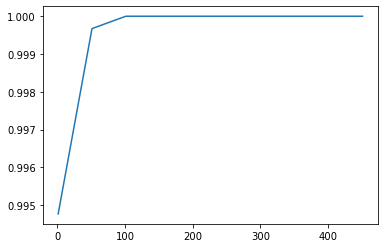

In [183]:
C_array = list(range(1,500,50))
score_array = []
for C in C_array:
    clf = LogisticRegression(random_state=0, max_iter=5000, C=C).fit(X, y)
    score_array.append(clf.score(X,y))
    
plt.plot(C_array,score_array)
    
    
    

### Learning Curve

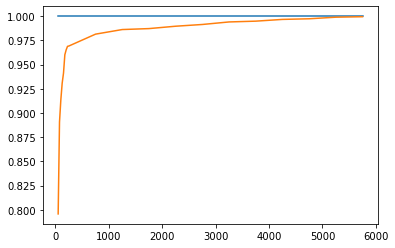

In [184]:
n_array = list(range(50,250,25)) + list(range(250,len(X),500))
correct_array = []
correct_array_cv = []
for n in n_array:
    clf = LogisticRegression(random_state=0, max_iter=5000, C=125).fit(X[0:n,:], y[0:n])
    correct_array.append(clf.score(X[0:n,:],y[0:n]))
    correct_array_cv.append(clf.score(X_cv,y_cv))

plt.plot(n_array,correct_array)
plt.plot(n_array,correct_array_cv)

In [192]:
clf =  LogisticRegression(random_state=0, max_iter=5000, C=125)
%timeit clf.fit(X, y)

11.6 s ± 174 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Support Vector Classification

In [175]:
clf = SVC(C=500)

In [176]:
clf.fit(X,y)

SVC(C=500)

In [177]:
clf.score(X,y)

1.0

In [178]:
clf.score(X_cv,y_cv)

1.0

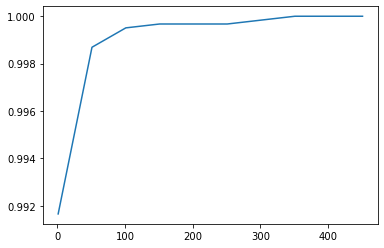

In [185]:
C_array = list(range(1,500,50))
score_array = []
for C in C_array:
    clf = SVC(C=C)
    clf = clf.fit(X, y)
    score_array.append(clf.score(X,y))
    
plt.plot(C_array,score_array)

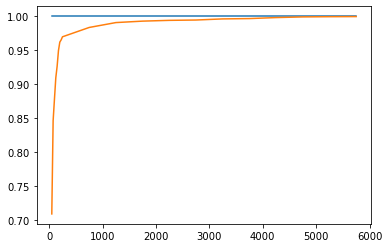

In [186]:
n_array = list(range(50,250,25)) + list(range(250,len(X),500))
correct_array = []
correct_array_cv = []
for n in n_array:
    clf = SVC(C=C)
    clf = clf.fit(X[0:n,:], y[0:n])
    correct_array.append(clf.score(X[0:n,:],y[0:n]))
    correct_array_cv.append(clf.score(X_cv,y_cv))

plt.plot(n_array,correct_array)
plt.plot(n_array,correct_array_cv)

In [187]:
clf = SVC(C=400)
%timeit clf.fit(X,y)

584 ms ± 3.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Random Forest Classification